In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
customers = pd.read_excel('/home/joao/Code/capstone/data/Customers.xlsx')
orders = pd.read_excel('/home/joao/Code/capstone/data/Orders.xlsx')

In [3]:
customers.head()

,Customer_ID,GENDER,AGE,GEOGRAPHY
0,2547,M,43,Greece
1,822,M,42,Spain
2,3686,F,39,France
3,3719,F,30,Italy
4,9200,F,31,Italy


In [4]:
orders.head()

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2021-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2021-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2021-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2021-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [5]:
customers.dtypes

Customer_ID     int64
GENDER         object
AGE             int64
GEOGRAPHY      object
dtype: object

In [6]:
orders.dtypes

id                         int64
Date              datetime64[ns]
Customer_ID                int64
Transaction_ID             int64
SKU_Category              object
SKU                       object
Quantity                 float64
Sales_Amount             float64
dtype: object

In [7]:
customers = customers.rename(columns={
    'Customer_ID':'customer_id',
    'GENDER':'gender',
    'AGE':'age',
    'GEOGRAPHY':'country'
})

In [8]:
customers.columns

Index(['customer_id', 'gender', 'age', 'country'], dtype='object')

In [9]:
orders = orders.rename(columns= {
    'Date':'date',
    'Customer_ID':'customer_id',
    'Transaction_ID':'transaction_id',
    'SKU_Category':'sku_category',
    'SKU':'sku',
    'Quantity':'quantity',
    'Sales_Amount':'sales_amount'
})

In [10]:
orders.columns

Index(['id', 'date', 'customer_id', 'transaction_id', 'sku_category', 'sku',
       'quantity', 'sales_amount'],
      dtype='object')

In [11]:
customers.isna().sum()

customer_id    0
gender         0
age            0
country        0
dtype: int64

In [12]:
orders.isna().sum()

id                0
date              0
customer_id       0
transaction_id    0
sku_category      0
sku               0
quantity          0
sales_amount      0
dtype: int64

In [13]:
orders.describe()

,id,date,customer_id,transaction_id,quantity,sales_amount
count,131706.000000,131706,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,2021-07-04 21:39:26.379663616,12386.450367,32389.604187,1.485318,11.981524
min,1.000000,2021-01-02 00:00:00,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,2021-04-05 00:00:00,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,2021-07-02 00:00:00,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,2021-10-07 00:00:00,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,2021-12-31 00:00:00,22625.000000,64682.000000,400.000000,707.730000
std,38020.391614,NaN,6086.447552,18709.901238,3.872666,19.359699


In [14]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%M-%d')
orders['date'].head()

0   2021-01-02
1   2021-01-02
2   2021-01-02
3   2021-01-02
4   2021-01-02
Name: date, dtype: datetime64[ns]

In [15]:
orders.to_csv('order.csv', index=False)

In [16]:
customers.to_csv('customers.csv', index=False)

In [17]:
# Merging the two DataFrames on 'customer_id'
merged_df = pd.merge(orders, customers, on='customer_id', how='inner')

# Display the first few rows of the merged DataFrame
merged_df.head()


,id,date,customer_id,transaction_id,sku_category,sku,quantity,sales_amount,gender,age,country
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece
1,639,2021-01-04,2547,332,Q4N,MM3E0,1.0,12.69,M,43,Greece
2,7800,2021-01-25,2547,3743,X52,885U7,1.0,4.95,M,43,Greece
3,7801,2021-01-25,2547,3743,29A,A59HR,3.0,6.24,M,43,Greece
4,17633,2021-02-22,2547,8477,L9F,7W8WS,1.0,11.75,M,43,Greece


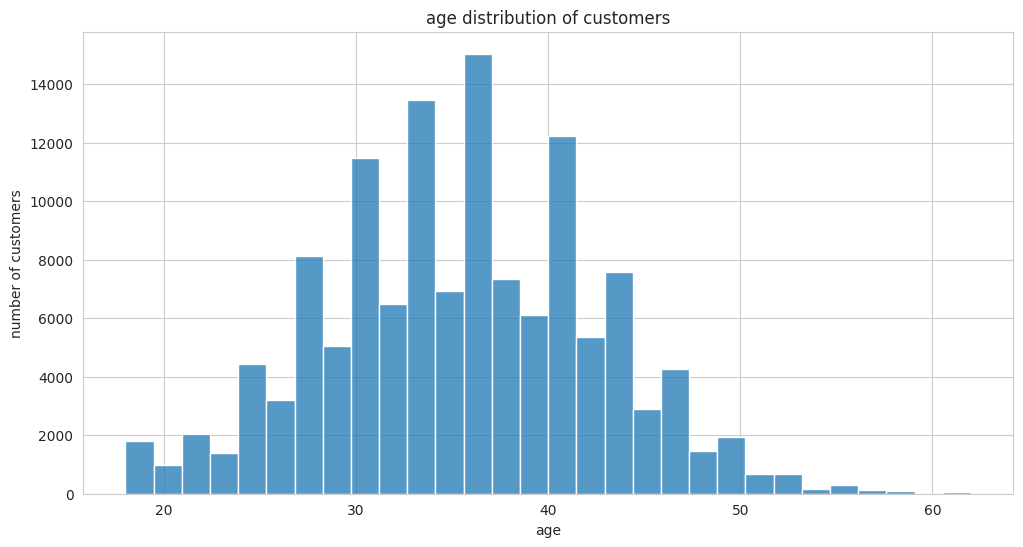

In [22]:
sns.set_style("whitegrid")

# Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['age'], bins=30, kde=False)
plt.title('age distribution of customers')
plt.xlabel('age')
plt.ylabel('number of customers')
plt.show()

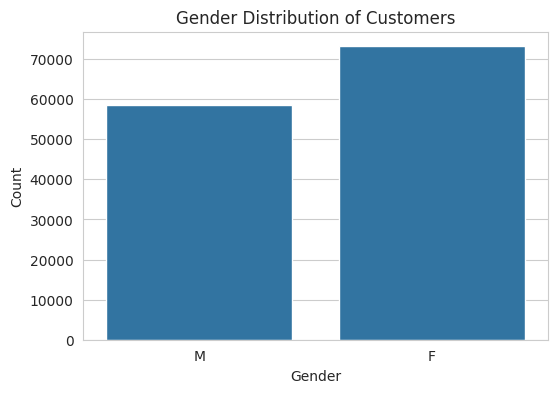

In [23]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=merged_df)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

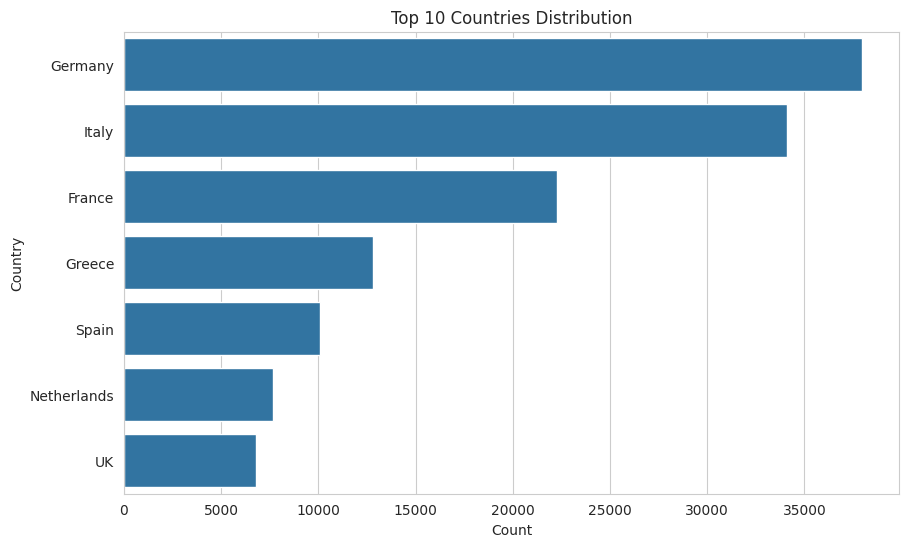

In [25]:
# Country Distribution
plt.figure(figsize=(10, 6))
country_counts = merged_df['country'].value_counts().head(10)  # Top 10 countries
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

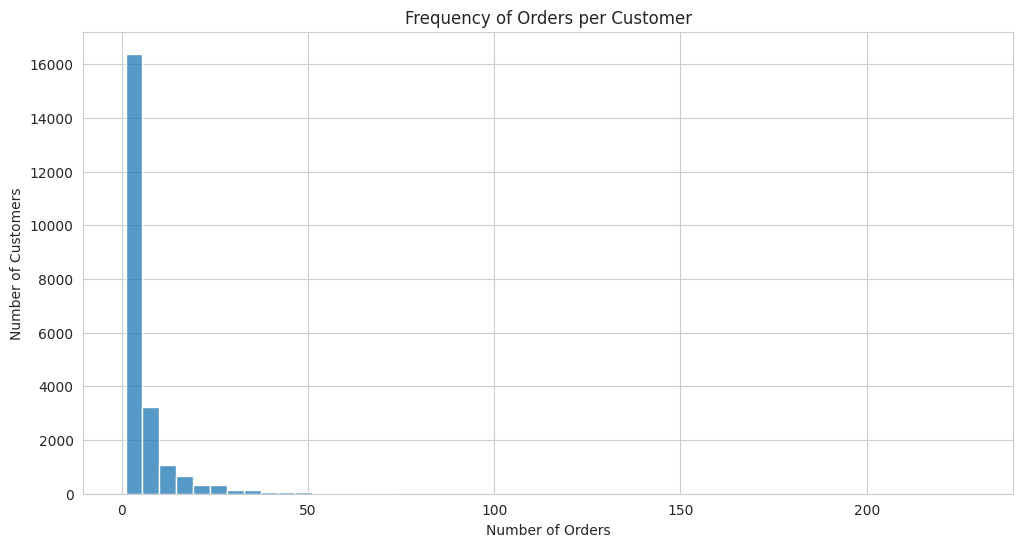

In [28]:
# Frequency of Orders per Customer
order_frequency = merged_df.groupby('customer_id')['id'].count()

plt.figure(figsize=(12, 6))
sns.histplot(order_frequency, bins=50, kde=False)
plt.title('Frequency of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

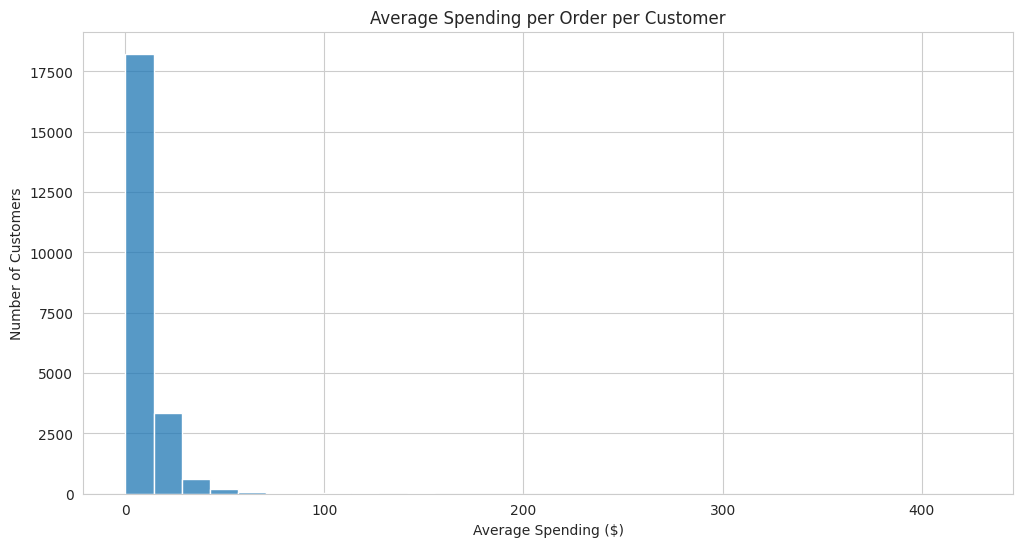

In [29]:
# Average Spending per Order
average_spending = merged_df.groupby('customer_id')['sales_amount'].mean()

plt.figure(figsize=(12, 6))
sns.histplot(average_spending, bins=30, kde=False)
plt.title('Average Spending per Order per Customer')
plt.xlabel('Average Spending ($)')
plt.ylabel('Number of Customers')
plt.show()